In [1]:
from simulator import Sim
from strategy import FuturePriceStrategy
from get_info import get_pnl
from load_data import load_md_from_file

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

PATH_TO_FILE = '../md/btcusdt:Binance:LinearPerpetual/'
NROWS = 100_000

In [2]:
md = load_md_from_file(path=PATH_TO_FILE, nrows=NROWS)

In [3]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = Sim(md, latency, md_latency)

/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_45924/3629183269.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  latency = pd.Timedelta(10, 'ms').delta
/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_45924/3629183269.py:2: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  md_latency = pd.Timedelta(10, 'ms').delta


In [4]:
delay = pd.Timedelta(0.1, 's').delta

hold_time = pd.Timedelta(10, 's').delta

strategy = FuturePriceStrategy(delay, hold_time, param_1= 1.69, param_2= -1.55, future_price_data= md)

/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_45924/178011416.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  delay = pd.Timedelta(0.1, 's').delta
/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_45924/178011416.py:3: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  hold_time = pd.Timedelta(10, 's').delta


In [6]:
%time trades_list, md_list, updates_list, all_orders, ask_list, bid_list = strategy.run(sim)

CPU times: user 3min 48s, sys: 2.97 s, total: 3min 51s
Wall time: 4min 50s


In [7]:
%time df = get_pnl(updates_list)

CPU times: user 1min 20s, sys: 1.05 s, total: 1min 21s
Wall time: 1min 25s


In [8]:
dt = pd.to_datetime(df.receive_ts)

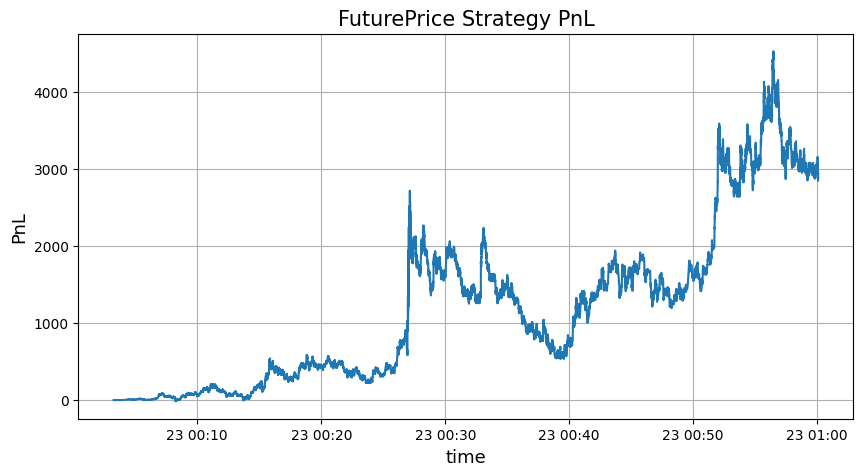

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("FuturePrice Strategy PnL", fontsize=15)
plt.grid()
plt.show()

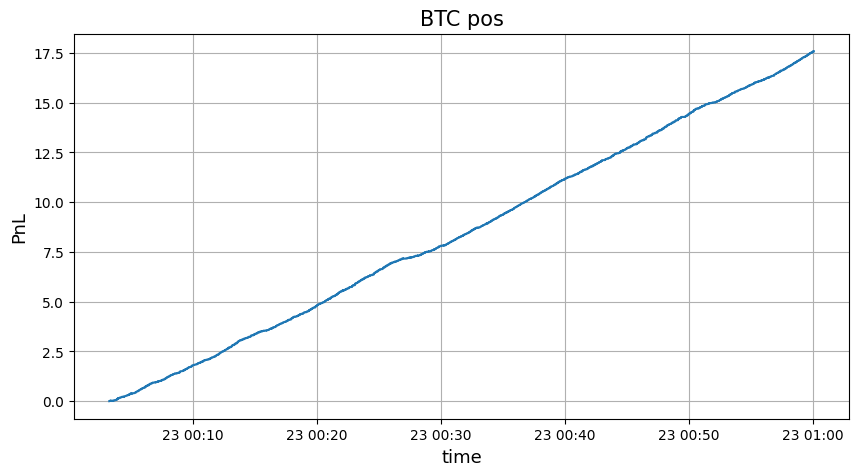

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df['BTC'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BTC pos", fontsize=15)
plt.grid()
plt.show()

In [15]:
df['mid_price']

0              NaN
1              NaN
2              NaN
3              NaN
4         19889.30
            ...   
183670    20406.15
183671    20406.15
183672    20406.90
183673    20406.95
183674    20406.95
Name: mid_price, Length: 183675, dtype: float64